In [1]:
import sys
import time
import numpy as np
import matplotlib.pyplot as plt
import math
from IPython.display import clear_output

sys.path.append('../modules')
from nsw import Node, NSWGraph
from nsw_visualization import show_state
import data_gen as dg

# Prepare the random graph

Size = 4000, K = 9
graph build
converged in 8 steps


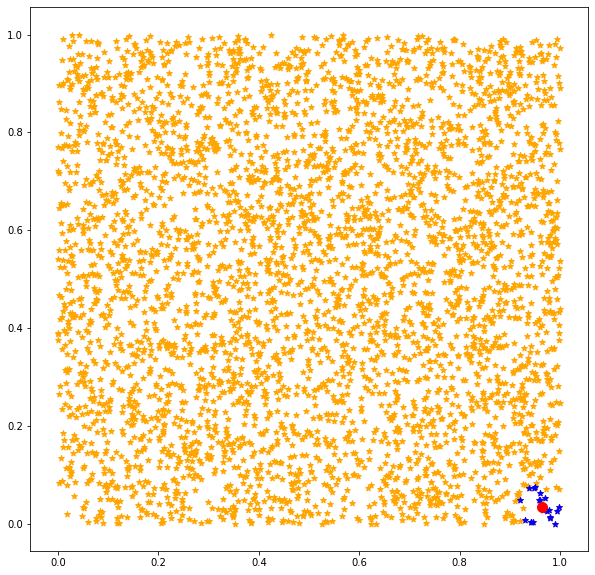

In [2]:
size = 4000
dim = 2
target = np.random.rand(1, dim)
K = math.ceil(math.log(size))
print(f"Size = {size}, K = {K}")

data = np.random.rand(size, dim)
data_labelled = [(row, 0) for row in data]

G = NSWGraph()
G.build_navigable_graph(data_labelled,  K=K, attempts=10)
print("graph build")
# G.plot()
items, hops = G.search_nsw_basic(target, top=20)
print(f"converged in {hops} steps")
result = data[items, :]
show_state(data, result, target=target)

In [3]:
def callback_searcher(leader, cloud):
    subset = data[np.array(cloud)[:,1].astype(int),:]
    clear_output(wait=True)
    show_state(data, subset, leader=leader.reshape(1, -1), target=target)
    # time.sleep(.2)

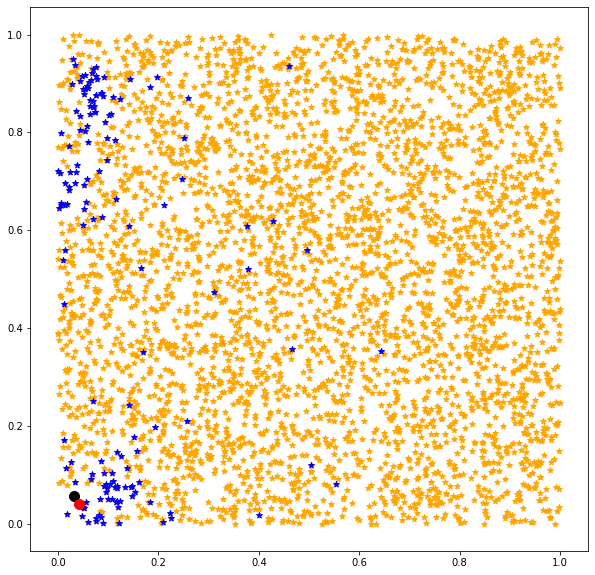

Converged in 8 hops


In [4]:
target = np.random.rand(1, dim)
for i in range(20):
    items, hops = G.search_nsw_basic(target, top=20, callback=callback_searcher)
    print(f"Converged in {hops} hops")